# Visualize the data from CSV

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

## First CSV file: "grafana_data_export_cpu.csv"

In [141]:
# Load the CSV
pd_raw = pd.read_csv("./grafana_data_export_cpu.csv", sep=';')
pd_raw.head(5)

,Series,Time,Value
0,cpu,2019-12-05T18:42:00-05:00,7.500
1,cpu,2019-12-05T18:42:20-05:00,7.875
2,cpu,2019-12-05T18:42:40-05:00,7.850
3,cpu,2019-12-05T18:43:00-05:00,7.500
4,cpu,2019-12-05T18:43:20-05:00,7.525


## For "CPU"

In [142]:
# Seperate the cpu and the memory
# CPU
cpu_pd_raw = pd_raw.loc[pd_raw['Series'] == 'cpu']

In [143]:
cpu_pd_raw.reset_index().head(5)

,index,Series,Time,Value
0,0,cpu,2019-12-05T18:42:00-05:00,7.500
1,1,cpu,2019-12-05T18:42:20-05:00,7.875
2,2,cpu,2019-12-05T18:42:40-05:00,7.850
3,3,cpu,2019-12-05T18:43:00-05:00,7.500
4,4,cpu,2019-12-05T18:43:20-05:00,7.525


In [144]:
# Drop the null and NAN
cpu_pd = cpu_pd_raw[np.isfinite(cpu_pd_raw['Value'])]
# cpu_pd.set_index('Time', inplace = True)
# cpu_pd.drop(columns=['Series']).head(3)

In [145]:
cpu_pd.head(3)

,Series,Time,Value
0,cpu,2019-12-05T18:42:00-05:00,7.500
1,cpu,2019-12-05T18:42:20-05:00,7.875
2,cpu,2019-12-05T18:42:40-05:00,7.850


In [146]:
cpu_pd["Time"][0]

'2019-12-05T18:42:00-05:00'

In [147]:
# Change "Time" into datetime
cpu_pd['time_stamp'] = pd.to_datetime(cpu_pd['Time'])

In [148]:
cpu_pd.head(3)

,Series,Time,Value,time_stamp
0,cpu,2019-12-05T18:42:00-05:00,7.500,2019-12-05 18:42:00-05:00
1,cpu,2019-12-05T18:42:20-05:00,7.875,2019-12-05 18:42:20-05:00
2,cpu,2019-12-05T18:42:40-05:00,7.850,2019-12-05 18:42:40-05:00


In [149]:
cp_of_pd = cpu_pd
cp_of_pd['time_stamp'] = cp_of_pd['time_stamp'].sub(cp_of_pd['time_stamp'][0], axis=0)

In [150]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40


In [152]:
cp_of_pd['time_stamp_sec'] = pd.Series(np.random.randn(len(cp_of_pd['Time'])), index = cp_of_pd.index)

In [153]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp,time_stamp_sec
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00,-0.823578
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20,-1.345504
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40,0.294568


In [155]:
cp_of_pd['time_stamp_sec'] = cp_of_pd['time_stamp'].dt.total_seconds()

In [156]:
cp_of_pd.head(3)

,Series,Time,Value,time_stamp,time_stamp_sec
0,cpu,2019-12-05T18:42:00-05:00,7.500,00:00:00,0.0
1,cpu,2019-12-05T18:42:20-05:00,7.875,00:00:20,20.0
2,cpu,2019-12-05T18:42:40-05:00,7.850,00:00:40,40.0


In [157]:
cpu_pd.set_index('time_stamp_sec', inplace = True)
# cpu_pd.drop(columns=['Series', ])

In [158]:
cpu_pd_plt = cpu_pd.drop(columns=['Series', 'Time', 'time_stamp'])

In [159]:
cpu_pd_plt.head(3)

,Value
time_stamp_sec,
0.0,7.500
20.0,7.875
40.0,7.850


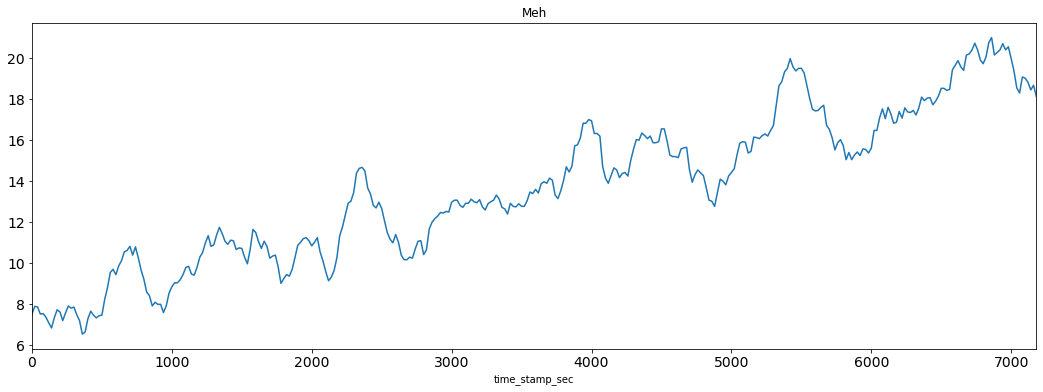

In [160]:
# Plot
cpu_pd_plt.Value.plot(figsize=(18,6), title = 'Meh', fontsize=14)
plt.show()

In [ ]:
# 

## For memory

In [18]:
# Memory
memory_pd_raw = pd_raw.loc[pd_raw['Series'] == 'memory']

In [23]:
memory_pd_raw.reset_index()

,index,Series,Time,Value
0,360,memory,2019-12-05T18:42:00-05:00,NaN
1,361,memory,2019-12-05T18:42:20-05:00,NaN
2,362,memory,2019-12-05T18:42:40-05:00,7.0
3,363,memory,2019-12-05T18:43:00-05:00,NaN
4,364,memory,2019-12-05T18:43:20-05:00,NaN
...,...,...,...,...
355,715,memory,2019-12-05T20:40:20-05:00,NaN
356,716,memory,2019-12-05T20:40:40-05:00,NaN
357,717,memory,2019-12-05T20:41:00-05:00,12.0
358,718,memory,2019-12-05T20:41:20-05:00,NaN


In [29]:
# Drop the NAN or null
memory_pd = memory_pd_raw[np.isfinite(memory_pd_raw['Value'])]

In [30]:
memory_pd

,Series,Time,Value
362,memory,2019-12-05T18:42:40-05:00,7.0
365,memory,2019-12-05T18:43:40-05:00,5.0
368,memory,2019-12-05T18:44:40-05:00,1.0
371,memory,2019-12-05T18:45:40-05:00,5.0
374,memory,2019-12-05T18:46:40-05:00,4.0
...,...,...,...
705,memory,2019-12-05T20:37:00-05:00,16.0
708,memory,2019-12-05T20:38:00-05:00,13.0
711,memory,2019-12-05T20:39:00-05:00,11.0
714,memory,2019-12-05T20:40:00-05:00,9.0
